In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/mtech_fde/Sarvesh_Projects/EX 6/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
def print_column_mean(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Check numeric columns
            mean_value = df[column].median()
            print(f"Mean of '{column}': {mean_value}")
        else:
            print(f"Skipping '{column}' (non-numeric)")

print_column_mean(df)

Mean of 'Pregnancies': 3.0
Mean of 'Glucose': 117.0
Mean of 'BloodPressure': 72.0
Mean of 'SkinThickness': 23.0
Mean of 'Insulin': 30.5
Mean of 'BMI': 32.0
Mean of 'DiabetesPedigreeFunction': 0.3725
Mean of 'Age': 29.0
Mean of 'Outcome': 0.0


In [25]:
def print_column_medians(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Check numeric columns
            median_value = df[column].median()
            print(f"Median of '{column}': {median_value}")
        else:
            print(f"Skipping '{column}' (non-numeric)")

print_column_medians(df)

Median of 'Pregnancies': 3.0
Median of 'Glucose': 117.0
Median of 'BloodPressure': 72.0
Median of 'SkinThickness': 23.0
Median of 'Insulin': 30.5
Median of 'BMI': 32.0
Median of 'DiabetesPedigreeFunction': 0.3725
Median of 'Age': 29.0
Median of 'Outcome': 0.0


In [ ]:
def print_column_modes(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            mode_values = df[column].mode()
            if len(mode_values) == 1:
                print(f"Mode of '{column}': {mode_values.iloc[0]}")
            else:
                print(f"Mode(s) of '{column}': {list(mode_values)}")
        else:
            print(f"Skipping '{column}' (non-numeric)")

print_column_modes(df)


Mode of 'Pregnancies': 1
Mode(s) of 'Glucose': [99, 100]
Mode of 'BloodPressure': 70
Mode of 'SkinThickness': 0
Mode of 'Insulin': 0
Mode of 'BMI': 32.0
Mode(s) of 'DiabetesPedigreeFunction': [0.254, 0.258]
Mode of 'Age': 22
Mode of 'Outcome': 0


In [ ]:
import pandas as pd

def skewness_with_classification(df):
    """
    Calculates skewness for each numeric column and classifies it.
    Returns a DataFrame with skew value and classification.
    """
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    skew_values = numeric_df.skew()

    skew_df = pd.DataFrame({
        "Skew Value": skew_values,
        "Classification": skew_values.apply(lambda x: 
            "Positively Skewed" if x > 0 else 
            ("Negatively Skewed" if x < 0 else "Symmetrical")
        )
    })

    return skew_df

result = skewness_with_classification(df)
print(result)


                          Skew Value     Classification
Pregnancies                 0.901674  Positively Skewed
Glucose                     0.173754  Positively Skewed
BloodPressure              -1.843608  Negatively Skewed
SkinThickness               0.109372  Positively Skewed
Insulin                     2.272251  Positively Skewed
BMI                        -0.428982  Negatively Skewed
DiabetesPedigreeFunction    1.919911  Positively Skewed
Age                         1.129597  Positively Skewed
Outcome                     0.635017  Positively Skewed


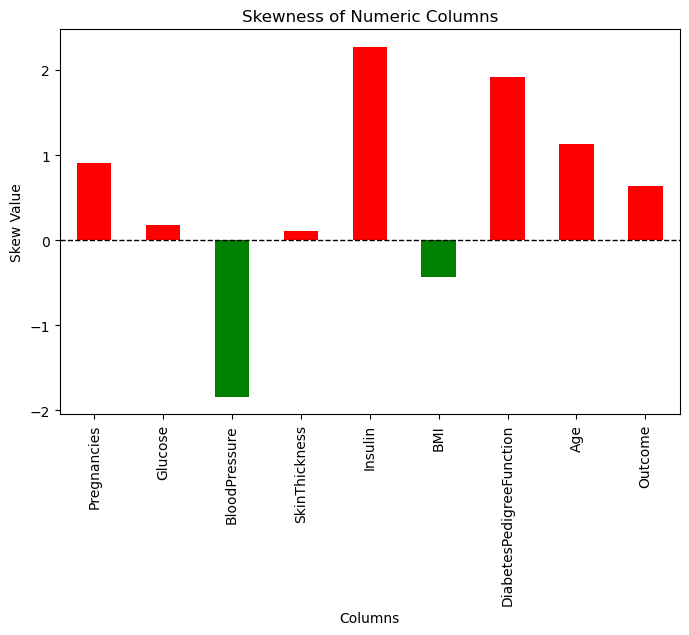

Pregnancies: 0.902 → Positively Skewed
Glucose: 0.174 → Positively Skewed
BloodPressure: -1.844 → Negatively Skewed
SkinThickness: 0.109 → Positively Skewed
Insulin: 2.272 → Positively Skewed
BMI: -0.429 → Negatively Skewed
DiabetesPedigreeFunction: 1.920 → Positively Skewed
Age: 1.130 → Positively Skewed
Outcome: 0.635 → Positively Skewed


In [ ]:
import matplotlib.pyplot as plt

def plot_skewness(df):
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    skew_values = numeric_df.skew()

    colors = ['green' if val < 0 else 'red' for val in skew_values]  # green for negative, red for positive

    plt.figure(figsize=(8, 5))
    skew_values.plot(kind='bar', color=colors)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.title("Skewness of Numeric Columns")
    plt.ylabel("Skew Value")
    plt.xlabel("Columns")
    plt.show()

    # Print classification
    for col, val in skew_values.items():
        if val > 0:
            print(f"{col}: {val:.3f} → Positively Skewed")
        elif val < 0:
            print(f"{col}: {val:.3f} → Negatively Skewed")
        else:
            print(f"{col}: {val:.3f} → Symmetrical")

plot_skewness(df)
